<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




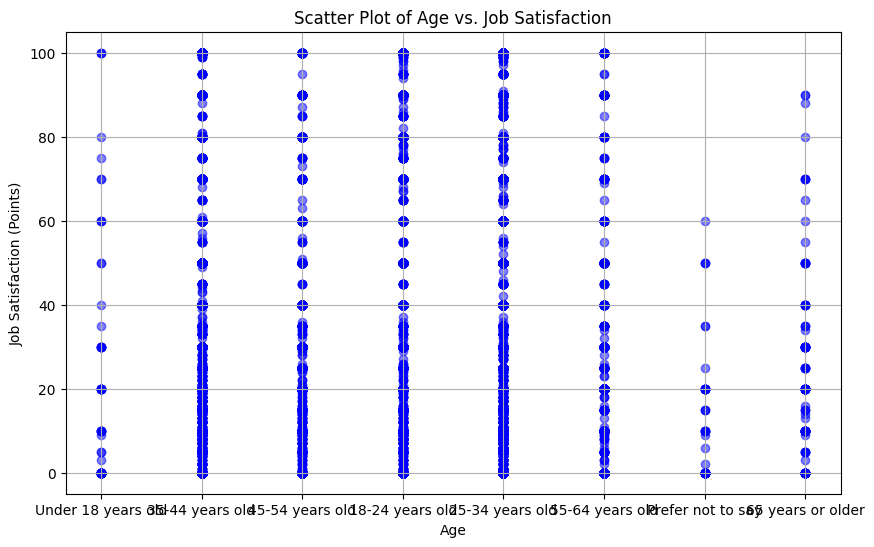

In [3]:
## Write your code here
# Scatter Plot for Age vs. Job Satisfaction
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['JobSatPoints_6'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Age vs. Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


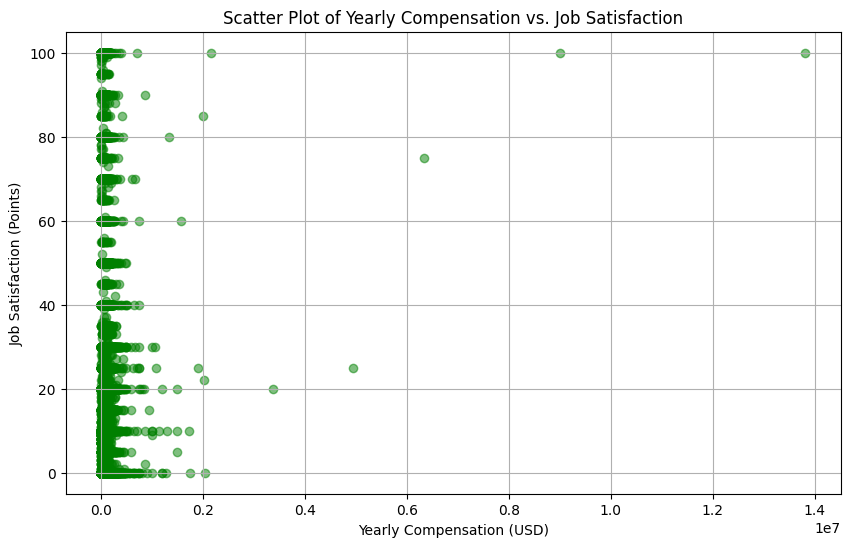

In [4]:
## Write your code here
# Scatter Plot for Compensation vs. Job Satisfaction
plt.figure(figsize=(10, 6))
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'], alpha=0.5, color='green')
plt.title('Scatter Plot of Yearly Compensation vs. Job Satisfaction')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.show()


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


Missing JobSatPoints_6 by Age group before imputation:
Age
18-24 years old        9774
25-34 years old       11079
35-44 years old        6868
45-54 years old        3261
55-64 years old        1589
65 years or older       653
Prefer not to say       271
Under 18 years old     2492
dtype: int64
Non-missing JobSatPoints_6 by Age group before imputation:
Age
18-24 years old        4324
25-34 years old       12832
35-44 years old        8074
45-54 years old        2988
55-64 years old         986
65 years or older       119
Prefer not to say        51
Under 18 years old       76
Name: JobSatPoints_6, dtype: int64
Missing JobSatPoints_6 after imputation: 0


/tmp/ipykernel_1112/944363320.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('Age').apply(lambda x: x['JobSatPoints_6'].isna().sum()))


Unique Age_numeric values in cleaned dataset: [16.  39.5 49.5 21.  29.5 59.5 70. ]
Number of data points in cleaned dataset: 65115
Unique Age values in cleaned dataset: ['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' '65 years or older']


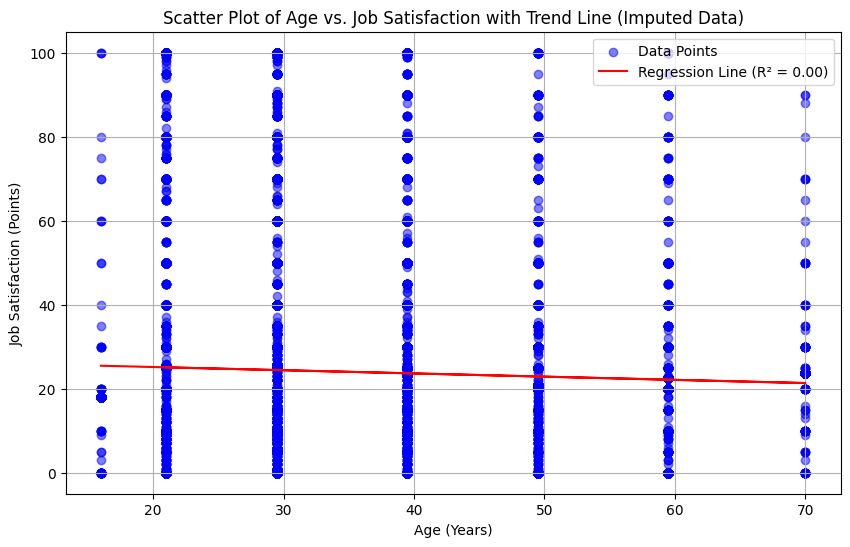

R² value: 0.00
Slope: -0.08


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Preprocess Age column (convert categorical age ranges to numerical midpoints)
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': np.nan  # Exclude from regression
}

# Create a new column with numerical ages
df['Age_numeric'] = df['Age'].map(age_mapping)

# Inspect missing JobSatPoints_6 before imputation
print("Missing JobSatPoints_6 by Age group before imputation:")
print(df.groupby('Age').apply(lambda x: x['JobSatPoints_6'].isna().sum()))
print("Non-missing JobSatPoints_6 by Age group before imputation:")
print(df.groupby('Age')['JobSatPoints_6'].count())

# Impute missing JobSatPoints_6 with the mean of each Age group
df['JobSatPoints_6'] = df.groupby('Age')['JobSatPoints_6'].transform(lambda x: x.fillna(x.mean()))

# Check if any missing values remain (e.g., if an Age group has all NaN)
print("Missing JobSatPoints_6 after imputation:", df['JobSatPoints_6'].isna().sum())

# Drop rows with missing Age_numeric or JobSatPoints_6 (e.g., 'Prefer not to say' or groups with all NaN)
df_clean = df.dropna(subset=['Age_numeric', 'JobSatPoints_6'])

# Inspect the cleaned dataset
print("Unique Age_numeric values in cleaned dataset:", df_clean['Age_numeric'].unique())
print("Number of data points in cleaned dataset:", len(df_clean))
print("Unique Age values in cleaned dataset:", df_clean['Age'].unique())

# Check if regression is possible
if len(df_clean['Age_numeric'].unique()) > 1:
    # Scatter Plot with Regression Line
    plt.figure(figsize=(10, 6))
    plt.scatter(df_clean['Age_numeric'], df_clean['JobSatPoints_6'], alpha=0.5, color='blue', label='Data Points')

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(df_clean['Age_numeric'], df_clean['JobSatPoints_6'])
    line = slope * df_clean['Age_numeric'] + intercept

    # Plot regression line
    plt.plot(df_clean['Age_numeric'], line, color='red', label=f'Regression Line (R² = {r_value**2:.2f})')

    plt.title('Scatter Plot of Age vs. Job Satisfaction with Trend Line (Imputed Data)')
    plt.xlabel('Age (Years)')
    plt.ylabel('Job Satisfaction (Points)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Print regression details
    print(f"R² value: {r_value**2:.2f}")
    print(f"Slope: {slope:.2f}")
else:
    # Scatter plot without regression
    print("Cannot perform linear regression: Insufficient variation in Age_numeric.")
    plt.figure(figsize=(10, 6))
    plt.scatter(df_clean['Age_numeric'], df_clean['JobSatPoints_6'], alpha=0.5, color='blue', label='Data Points')
    plt.title('Scatter Plot of Age vs. Job Satisfaction (No Trend Line, Imputed Data)')
    plt.xlabel('Age (Years)')
    plt.ylabel('Job Satisfaction (Points)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Analyze JobSatPoints_6 distribution for the available age group
    print("Analyzing Job Satisfaction for available age group:")
    plt.figure(figsize=(10, 6))
    plt.hist(df_clean['JobSatPoints_6'], bins=20, color='blue', edgecolor='black')
    plt.title("Distribution of Job Satisfaction (Imputed Data)")
    plt.xlabel('Job Satisfaction (Points)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


Unique Age_numeric values: [39.5 49.5 29.5 21.  59.5 16.  70. ]
Number of data points: 51487
Unique YearsCodePro values (sample): ['17' '27' '7' '11' '25' '12' '10' '3' 'Less than 1 year' '18']


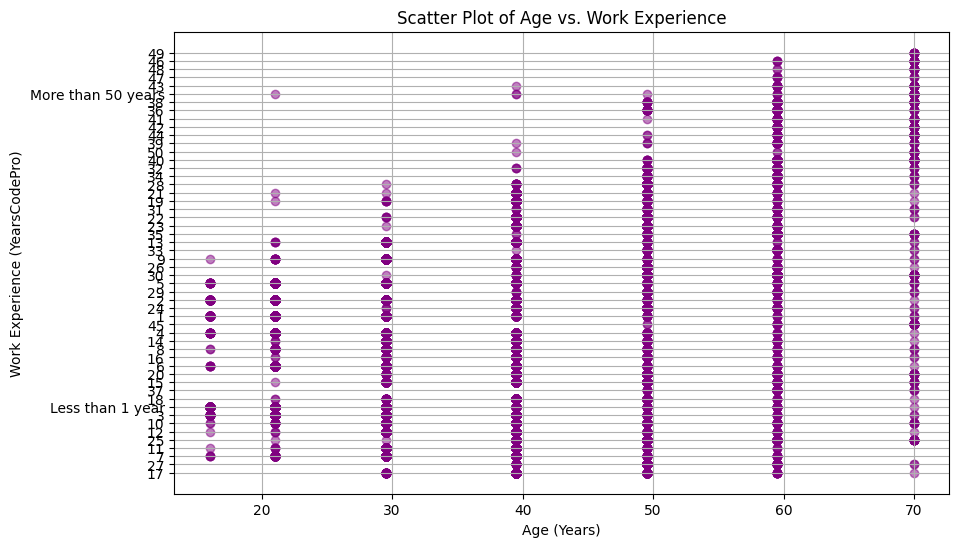

In [11]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Preprocess Age column (convert categorical age ranges to numerical midpoints)
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None  # Map to None to exclude from plot
}

# Create a new column with numerical ages
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows with missing Age_numeric or YearsCodePro
df_clean = df.dropna(subset=['Age_numeric', 'YearsCodePro'])

# Inspect the cleaned dataset
print("Unique Age_numeric values:", df_clean['Age_numeric'].unique())
print("Number of data points:", len(df_clean))
print("Unique YearsCodePro values (sample):", df_clean['YearsCodePro'].unique()[:10])  # Show first 10 for brevity

# Scatter Plot for Age vs. Work Experience
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Age_numeric'], df_clean['YearsCodePro'], alpha=0.5, color='purple')
plt.title('Scatter Plot of Age vs. Work Experience')
plt.xlabel('Age (Years)')
plt.ylabel('Work Experience (YearsCodePro)')
plt.grid(True)
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


Unique Age_numeric values: [21.  29.5 39.5 49.5 59.5 70.  16. ]
Number of data points: 23426
Sample ConvertedCompYearly range: 1.0 to 16256603.0
Sample JobSatPoints_6 range: 0.0 to 100.0


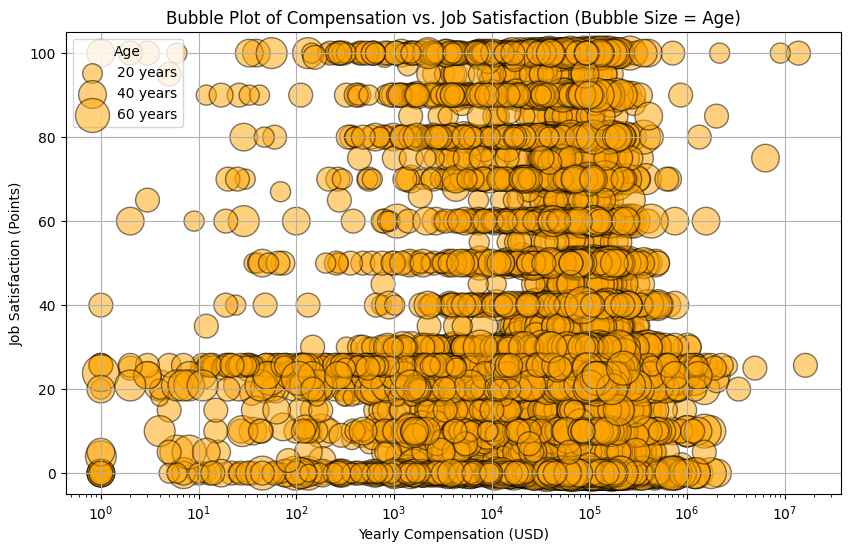

In [12]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Preprocess Age column (convert categorical age ranges to numerical midpoints)
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None  # Map to None to exclude
}

# Create a new column with numerical ages
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows with missing values in ConvertedCompYearly, JobSatPoints_6, or Age_numeric
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric'])

# Inspect the cleaned dataset
print("Unique Age_numeric values:", df_clean['Age_numeric'].unique())
print("Number of data points:", len(df_clean))
print("Sample ConvertedCompYearly range:", df_clean['ConvertedCompYearly'].min(), "to", df_clean['ConvertedCompYearly'].max())
print("Sample JobSatPoints_6 range:", df_clean['JobSatPoints_6'].min(), "to", df_clean['JobSatPoints_6'].max())

# Scale Age_numeric for bubble sizes (adjust size for visibility)
# Map Age_numeric to a reasonable size range (e.g., 50 to 500)
bubble_sizes = df_clean['Age_numeric'] * 10  # Multiply by 10 for visible sizes, adjust as needed

# Bubble Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['ConvertedCompYearly'], df_clean['JobSatPoints_6'], 
            s=bubble_sizes, alpha=0.5, color='orange', edgecolors='black')
plt.title('Bubble Plot of Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)

# Optional: Add a logarithmic scale for compensation if range is wide
plt.xscale('log')

# Add a legend for bubble sizes (approximate)
sizes = [20, 40, 60]  # Example ages for legend
labels = ['20 years', '40 years', '60 years']
legend_bubbles = [plt.scatter([], [], s=size*10, color='orange', alpha=0.5, edgecolors='black', label=label)
                  for size, label in zip(sizes, labels)]
plt.legend(handles=legend_bubbles, title='Age', loc='upper left')

plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


Language Statistics:
                   Language  Popularity  AvgJobSatisfaction
0                       Ada         542           23.231451
1                      Apex         502           22.301173
2                  Assembly        3233           23.759742
3   Bash/Shell (all shells)       20412           23.501956
4                         C       12184           23.739533
5                        C#       16318           24.268910
6                       C++       13827           23.856065
7                   Clojure         737           23.038973
8                     Cobol         413           24.155185
9                   Crystal         253           24.404660
10                     Dart        3594           25.024566
11                   Delphi        1073           22.860795
12                   Elixir        1243           22.959903
13                   Erlang         522           22.821496
14                       F#         512           24.246442
15                 

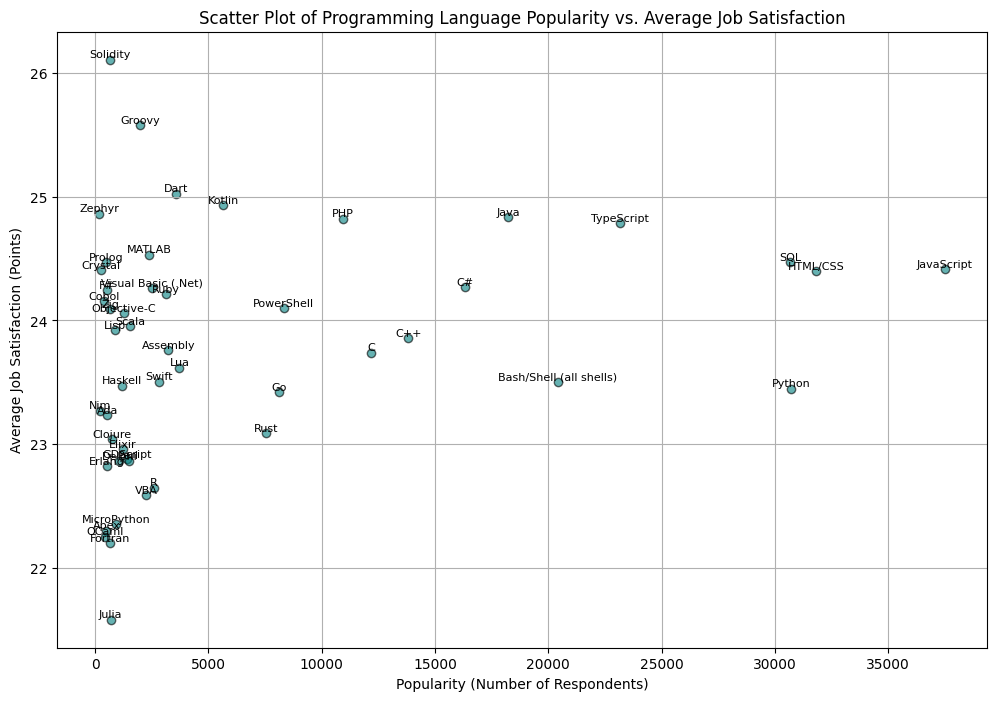

In [13]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing LanguageHaveWorkedWith or JobSatPoints_6
df_clean = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6'])

# Split LanguageHaveWorkedWith into individual languages
# Create a list of (language, JobSatPoints_6) pairs
language_satisfaction = []
for idx, row in df_clean.iterrows():
    languages = row['LanguageHaveWorkedWith'].split(';')
    for lang in languages:
        if lang.strip():  # Ignore empty strings
            language_satisfaction.append((lang.strip(), row['JobSatPoints_6']))

# Create a DataFrame from language-satisfaction pairs
lang_df = pd.DataFrame(language_satisfaction, columns=['Language', 'JobSatPoints_6'])

# Calculate popularity (count) and average job satisfaction per language
lang_stats = lang_df.groupby('Language').agg(
    Popularity=('JobSatPoints_6', 'count'),
    AvgJobSatisfaction=('JobSatPoints_6', 'mean')
).reset_index()

# Inspect the results
print("Language Statistics:")
print(lang_stats[['Language', 'Popularity', 'AvgJobSatisfaction']])

# Scatter Plot
plt.figure(figsize=(12, 8))
plt.scatter(lang_stats['Popularity'], lang_stats['AvgJobSatisfaction'], 
            alpha=0.6, color='teal', edgecolors='black')

# Label points with language names
for i, row in lang_stats.iterrows():
    plt.text(row['Popularity'], row['AvgJobSatisfaction'], row['Language'], 
             fontsize=8, ha='center', va='bottom')

plt.title('Scatter Plot of Programming Language Popularity vs. Average Job Satisfaction')
plt.xlabel('Popularity (Number of Respondents)')
plt.ylabel('Average Job Satisfaction (Points)')
plt.grid(True)
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


Unique Employment types: ['Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Employed, full-time'
 'Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, full-time'
 'Student, part-time;Employed, part-time'
 'Student, full-time;Independent contractor, freelancer, or self-employed'
 'Retired'
 'Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Not employed, but looking for work' 'Employed, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Student, full-time;Employed, part-time'
 'Employed, full-time;Employed, part-time'
 'Independent contractor, freelancer, or self-employed;Student, part-time'
 'Empl

/tmp/ipykernel_1112/495289500.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Color'] = df_clean['Employment'].map(employment_colors).fillna('cyan')


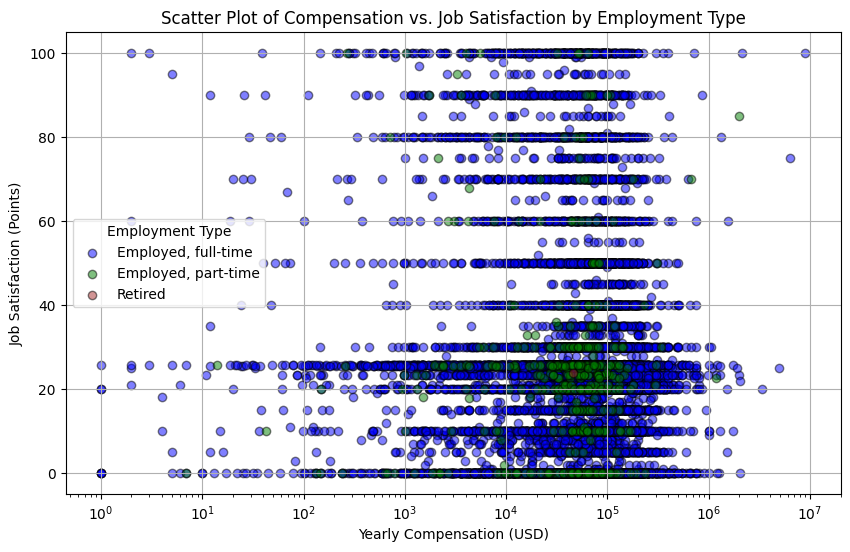

In [14]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Drop rows with missing values in ConvertedCompYearly, JobSatPoints_6, or Employment
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment'])

# Inspect the cleaned dataset
print("Unique Employment types:", df_clean['Employment'].unique())
print("Number of data points:", len(df_clean))
print("Sample ConvertedCompYearly range:", df_clean['ConvertedCompYearly'].min(), "to", df_clean['ConvertedCompYearly'].max())
print("Sample JobSatPoints_6 range:", df_clean['JobSatPoints_6'].min(), "to", df_clean['JobSatPoints_6'].max())

# Define colors and markers for employment types
# Use a dictionary to map employment types to colors
employment_colors = {
    'Employed, full-time': 'blue',
    'Employed, part-time': 'green',
    'Freelance': 'red',
    'Self-employed': 'purple',
    'Student': 'orange',
    'Retired': 'brown',
    'Not employed': 'gray',
    'Other': 'cyan'  # Fallback for unexpected types
}

# Map employment types to colors, using 'Other' for unmapped types
df_clean['Color'] = df_clean['Employment'].map(employment_colors).fillna('cyan')

# Scatter Plot
plt.figure(figsize=(10, 6))

# Plot each employment type separately to create a legend
for emp_type, color in employment_colors.items():
    # Filter data for the employment type
    subset = df_clean[df_clean['Employment'] == emp_type]
    if not subset.empty:
        plt.scatter(subset['ConvertedCompYearly'], subset['JobSatPoints_6'], 
                    c=color, alpha=0.5, label=emp_type, edgecolors='black')

plt.title('Scatter Plot of Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (Points)')
plt.xscale('log')  # Log scale for wide compensation range
plt.grid(True)
plt.legend(title='Employment Type')
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


Selected Countries: ['United States of America', 'Germany', 'India', 'United Kingdom of Great Britain and Northern Ireland', 'Ukraine']
Unique Age_numeric values: [39.5 49.5 21.  29.5 59.5 70.  16. ]
Number of data points: 22334
Sample YearsCodePro range: 1 to More than 50 years


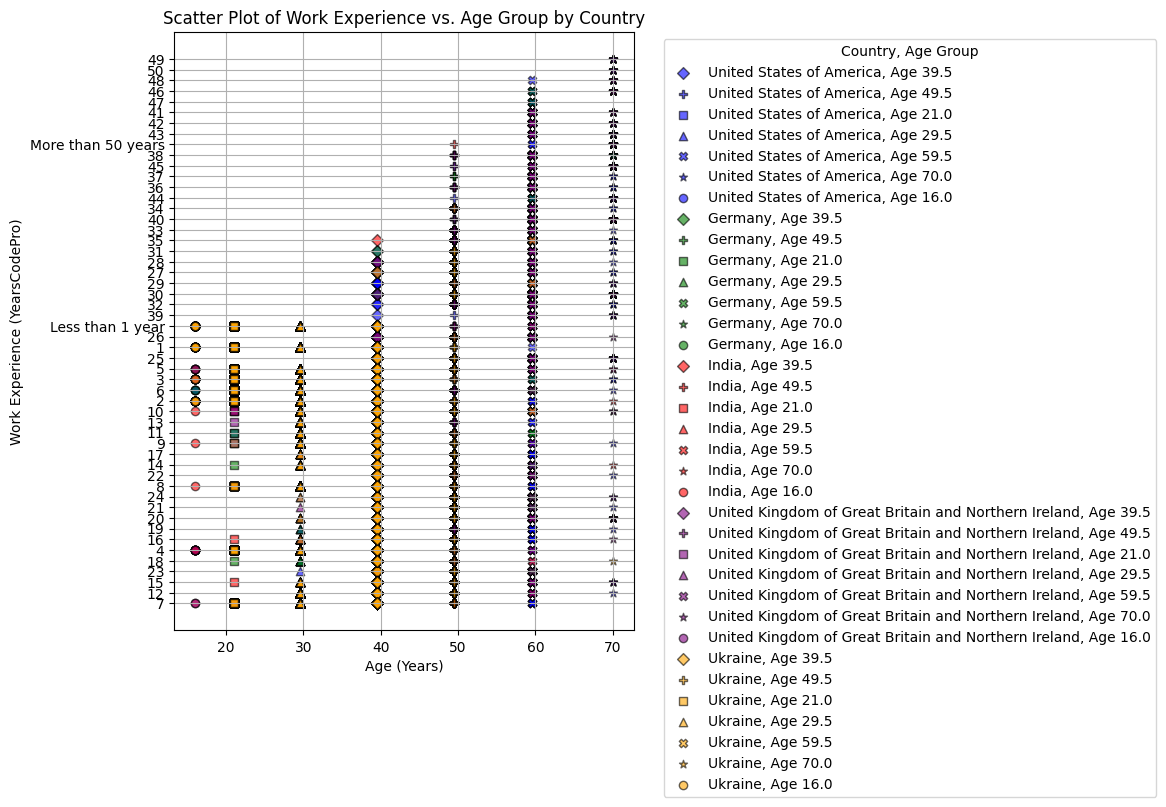

In [15]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Preprocess Age column (convert categorical age ranges to numerical midpoints)
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None  # Map to None to exclude
}

# Create a new column with numerical ages
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows with missing values in YearsCodePro, Age_numeric, or Country
df_clean = df.dropna(subset=['YearsCodePro', 'Age_numeric', 'Country'])

# Select top 5 countries by respondent count to avoid clutter
top_countries = df_clean['Country'].value_counts().head(5).index
df_clean = df_clean[df_clean['Country'].isin(top_countries)]

# Inspect the cleaned dataset
print("Selected Countries:", top_countries.tolist())
print("Unique Age_numeric values:", df_clean['Age_numeric'].unique())
print("Number of data points:", len(df_clean))
print("Sample YearsCodePro range:", df_clean['YearsCodePro'].min(), "to", df_clean['YearsCodePro'].max())

# Define colors for countries and markers for age groups
country_colors = {
    top_countries[0]: 'blue',
    top_countries[1]: 'green',
    top_countries[2]: 'red',
    top_countries[3]: 'purple',
    top_countries[4]: 'orange'
}

age_markers = {
    16: 'o',    # Under 18
    21: 's',    # 18-24
    29.5: '^',  # 25-34
    39.5: 'D',  # 35-44
    49.5: 'P',  # 45-54
    59.5: 'X',  # 55-64
    70: '*'     # 65+
}

# Scatter Plot
plt.figure(figsize=(12, 8))

# Plot each country and age group combination
for country in top_countries:
    for age in df_clean['Age_numeric'].unique():
        subset = df_clean[(df_clean['Country'] == country) & (df_clean['Age_numeric'] == age)]
        if not subset.empty:
            plt.scatter(subset['Age_numeric'], subset['YearsCodePro'], 
                        c=country_colors[country], 
                        marker=age_markers.get(age, 'o'), 
                        alpha=0.6, 
                        label=f'{country}, Age {age}', 
                        edgecolors='black')

plt.title('Scatter Plot of Work Experience vs. Age Group by Country')
plt.xlabel('Age (Years)')
plt.ylabel('Work Experience (YearsCodePro)')
plt.grid(True)

# Create a legend
plt.legend(title='Country, Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
